# Shiivong Kapil Birla - 30046572


# Task A - Analyzing Text Data

## Importing Libraries

- **SparkContext** and **SparkConf** from **pyspark** to create a **Spark Instance**
- **SparkSession** from **pyspark.sql** to work with the **SparkSession**
- **re** for **Regular Expressions**
- **nltk** for **Natural Language Processing**
- **matplotlib** for making **appealing visualizations**

# Step 1 - Import pyspark and Initialize Spark

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import re
import nltk
import matplotlib.pyplot as plt

We are going to be creating a **Spark session** which will the configuration of our Spark **environment** and a **Spark Context** which will store this config.

In [2]:
config = SparkConf() 

config.set("spark.app.name", "Spark Assignment 1") 
config.set("spark.master", "local[8]")
config.set("spark.ui.port", "4060")  

spark_context = SparkContext(conf = config)

After the creation of the session and the context manager, let's finally call it into action! 

In [3]:
spark_context = SparkContext.getOrCreate()

We shall now check if the `spark_context` has been created or not. If not, we will initialize the Spark session with our previously defined `spark_context` variable. 

In [4]:
if spark_context is None:
    spark_context = SparkContext(master = "local[*]", appName = "Spark Assignment 1 Task A")

spark = SparkSession(sparkContext = spark_context)

Alas! We're all set to start creating and working on **RDD's** now. Let's jump right in.

# Step 2 - Create Resilient Distributed Datasets (RDDs)

Using the `.textfile` function along with the `spark_context` variable which we created earlier, we can read in both the input files as **RDD's**

In [5]:
book_scrum = spark_context.textFile('Scrum Handbook.txt')
book_agile = spark_context.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')

## Please not that we will refer Book 1 as 'Agile' and Book 2 as 'Scrum' throughout the notebook.

Great! It's loaded as an RDD. How many lines do these two books have? On we go to that!

In [6]:
book_scrum_lines = book_scrum.count()
print("The number of lines in Scrum Handbook.txt is : ", book_scrum_lines)

The number of lines in Scrum Handbook.txt is :  4617


In [7]:
book_agile_lines = book_agile.count()
print("The number of lines in Agile Processes in Software Engineering  and Extreme Programming.txt is : ", book_agile_lines)

The number of lines in Agile Processes in Software Engineering  and Extreme Programming.txt is :  21569


So, the **Scrum handbook** has **4617** lines whereas the **Agile handbook** has **21569** lines in total. 

# Step 3 - Cleaning/Manipulating Text

In this step, we can make use of the `.collect()` method on an RDD to print it's content. We can them decide on how to tackle this task. We will store the results in `book_scrum_text` and `book_agile_text` for scrum and agile respectively.

In [8]:
book_scrum_text = book_scrum.collect()
book_agile_text = book_agile.collect()

Let's inspect them closely to see how we can go about championing this task!

In [9]:
book_scrum_text[0:10]

["Jeff Sutherland's ",
 '',
 'Scrum Handbook ',
 '',
 '',
 '',
 '',
 'Everything ',
 'you need ',
 'to know ']

In [10]:
book_agile_text[0:10]

['LNBIP251 ',
 '',
 '',
 'I Helen Sharp ',
 '',
 'Tracy Hall (Eds.) ',
 '',
 'Agile Processes ',
 'in Software Engineering ',
 'and Extreme Programming ']

In this task, we're required to :

1) Convert everthing to lower case.

2) Remove numbers and special characters.

3) Remove trailing spaces.

In the RDD's displayed above, we can see that none of this has been done. For converting everything into **lower** case, we can use the `.lower()` method on each and every word or character in the lists of string.

For **removing the numbers and special characters**, we can only retain those characters which are left after we use the `.isalpha()` method on the string. We will also have to retain any **space character** that fills the gaps between words.

For the **trailing spaces**, we can use the `.strip()` method on the string.

Puting all of this into a **user defined function**, and we can be done with step 3.

In [11]:
def cleaning_text(uncleaned_text):
    
    cleaning_text_str = ''
    
    for char in uncleaned_text:
        
        if (char.isalpha()) or (char == ' '):
            cleaning_text_str = cleaning_text_str + char.lower()
    cleaning_text_str = cleaning_text_str.strip()
    
    return cleaning_text_str           

The function is defined, now all we need to do is to use the `.map()` method on the RDD and pass this function. The outsput will be the cleaned text that we want for our analysis.

In [12]:
book_scrum_clean = book_scrum.map(cleaning_text)

In [13]:
book_scrum_clean.collect()[0:10]

['jeff sutherlands',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'you need',
 'to know']

In [14]:
book_agile_clean = book_agile.map(cleaning_text)

In [15]:
book_agile_clean.collect()[0:10]

['lnbip',
 '',
 '',
 'i helen sharp',
 '',
 'tracy hall eds',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming']

As we can see clearly, all the things that the function `cleaning_text` was aimed to do, has been achieved and now we can move to step 4. After this step, we can say that we have achieved :

1) Converted everthing to lower case.

2) Removed numbers and special characters.

3) Removed trailing spaces.

# Step 4 - Transforming the Data/Counting the Words

In this step, we are required to **split each word in the RDD by spaces** and then create a word of pairs and **count the frequency of each word** and then finally, display the **top20 words**.

To do this, we can write a **lambda** function which splits each word in our `book_scrum_clean` and `book_agile_clean` and takes only the words which have a **length greater than 0**, i.e. words which have atleast 2 occurences in the RDD's.

In [16]:
tokenized_scrum = book_scrum_clean.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

In [17]:
tokenized_agile = book_agile_clean.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

Let's inspect both `tokenized_scrum` and `tokenized_agile` variables by displaying the first 10 split words list.

In [18]:
tokenized_scrum.collect()[0:10]

['jeff',
 'sutherlands',
 'scrum',
 'handbook',
 'everything',
 'you',
 'need',
 'to',
 'know',
 'to']

In [19]:
tokenized_agile.collect()[0:10]

['lnbip',
 'i',
 'helen',
 'sharp',
 'tracy',
 'hall',
 'eds',
 'agile',
 'processes',
 'in']

Looks like this worked perfectly fine! Time to count the **frequency of occurences** of these words.

We can make use of the `.map()` again, but this time pass it to `tokenized_scrum` and `tokenized_agile` pipelineRDD which we created above. We will also **swap the words and their frequencies** so that it becomes easier to plot them later on.

In [20]:
word_frequency_scrum = tokenized_scrum.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y)

In [21]:
word_frequency_agile = tokenized_agile.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y)

We have used the `.reduceByKey()` method on ourpipelineRDD's which will basically **add all the words and their counts** and **return the word and their frequency in the whole file**. Let's inspect the `word_frequency_scrum` and `word_frequency_agile` variables.

In [22]:
word_frequency_scrum.collect()[0:10]

[('jeff', 48),
 ('scrum', 395),
 ('everything', 6),
 ('know', 10),
 ('start', 6),
 ('project', 92),
 ('in', 360),
 ('training', 10),
 ('institute', 11),
 ('this', 142)]

In [23]:
word_frequency_agile.collect()[0:10]

[('i', 418),
 ('helen', 10),
 ('tracy', 7),
 ('eds', 80),
 ('agile', 748),
 ('processes', 58),
 ('in', 3076),
 ('engineering', 154),
 ('extreme', 29),
 ('programming', 79)]

Great! This looks amazing, with the words next to it's frequency in the whole file! Now we can **sort** this pipelineRDD unsing the `.sortByKey()` method on `word_frequency_scrum` and `word_frequency_agile` and display only the top 20 words in each pipelineRDD using the `.take()` method.

In [24]:
word_frequency_swapped_scrum = word_frequency_scrum.map(lambda x: (x[1],x[0]))
top_twenty_scrum = word_frequency_swapped_scrum.sortByKey(0,1).take(20)

top_twenty_scrum

[(1238, 'the'),
 (537, 'of'),
 (534, 'and'),
 (477, 'to'),
 (451, 'a'),
 (395, 'scrum'),
 (360, 'in'),
 (348, 'is'),
 (260, 'team'),
 (232, 'product'),
 (195, 'for'),
 (181, 'that'),
 (165, 'it'),
 (149, 'on'),
 (146, 'sprint'),
 (142, 'this'),
 (132, 'with'),
 (124, 'as'),
 (119, 'are'),
 (118, 'by')]

In [25]:
word_frequency_swapped_agile = word_frequency_agile.map(lambda x: (x[1],x[0]))
top_twenty_agile = word_frequency_swapped_agile.sortByKey(0,1).take(20)

top_twenty_agile

[(8145, 'the'),
 (3965, 'and'),
 (3944, 'of'),
 (3714, 'to'),
 (3076, 'in'),
 (2701, 'a'),
 (1539, 'is'),
 (1355, 'that'),
 (1194, 'for'),
 (1028, 'as'),
 (1015, 'on'),
 (975, 'we'),
 (969, 'with'),
 (922, 'software'),
 (915, 'this'),
 (784, 'are'),
 (748, 'agile'),
 (741, 'it'),
 (737, 'development'),
 (711, 'was')]

Looks like we have achieved this steps objective! But on closer inspection, we see that there are so many **stopwords** in our list! Any operation we do on this text will likely use a lot of computation and likely not give a very meaningful answer becasue of the stopwords.

Hence, we need to remove the stopwords at all costs! We shall do that in **Step 5**.

# Step 5 - Removing Stop Words

In [26]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We must download the set of stopwords using the `.download()` method of the **nltk** package. Also, we need to import stopwords from nltk.corpus as well. Then, we store the **set of stopwords** in the `words_stop` variable which we will use later.

In [27]:
from nltk.corpus import stopwords
words_stop = set(stopwords.words('english'))

Since we need to remove the the stopwords from two different RDD's and also we need to perform multiple operations on our text, so it's best we define a function. We have named it `stopwords_removal` and it will take one mandatory arguement, string.

It will **split** the string and store it in the `string_split` variable, we will also define a **null** string in the form of `string_final` variable. Running a loop for every word in string_split, we will see that is the word is **not** present in our **words_stop** stopwords list, then we will append the word to the `string_final` string and also add a **space** character.

Finally, while returning the final string, we will **strip** it from any trailing spaces that it might have encountered.

In [28]:
def stopwords_removal(string):
    
    string_split = string.split()
    string_final = ''
    
    for word in string_split:
        
        if word not in words_stop:
            string_final += word + ' '
    
    string_final = string_final.strip()
    
    return string_final

Using the `.map()` method on the `book_scrum_clean` and `book_agile_clean` pipelineRDD's with the `stopwords_removal()` function, we can remove the stopwords entirely! We shall store the results in the `scrum_stop_words_removed` and `agile_stop_words_removed` variables respectively. 

In [29]:
scrum_stop_words_removed = book_scrum_clean.map(stopwords_removal)

Viewing the top 10 results from the `scrum_stop_words_removed` variable.

In [30]:
scrum_stop_words_removed.collect()[0:10]

['jeff sutherlands',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'need',
 'know']

Similarly for the **agile** pipelineRDD.

In [31]:
agile_stop_words_removed = book_agile_clean.map(stopwords_removal)

Viewing the top 10 results from the `agile_stop_words_removed` variable.

In [32]:
agile_stop_words_removed.collect()[0:10]

['lnbip',
 '',
 '',
 'helen sharp',
 '',
 'tracy hall eds',
 '',
 'agile processes',
 'software engineering',
 'extreme programming']

Using the `.flatMap()` method that we have used earlier as well, will split the `agile_stop_words_removed` and `scrum_stop_words_removed` pipelineRDD's into **individual tokens** and store them in a **list of tokens** for both scrum and agile. We will call those variables `scrum_tokenized` and `agile_tokenized`. 

In [33]:
scrum_tokenized = scrum_stop_words_removed.flatMap(lambda sentences: sentences.split(" "))\
.filter(lambda terms: terms != '')

In [34]:
agile_tokenized = agile_stop_words_removed.flatMap(lambda sentences: sentences.split(" "))\
.filter(lambda terms: terms != '')

Displaying the tokenized words in a list for both scrum and agile.

In [35]:
scrum_tokenized.collect()[0:10]

['jeff',
 'sutherlands',
 'scrum',
 'handbook',
 'everything',
 'need',
 'know',
 'start',
 'scrum',
 'project']

In [36]:
agile_tokenized.collect()[0:10]

['lnbip',
 'helen',
 'sharp',
 'tracy',
 'hall',
 'eds',
 'agile',
 'processes',
 'software',
 'engineering']

Now, we want to count the **frequency** of these words. We will take the same approach as we did last time around, using a **lambda** function to calculate using the `.reduceByKey()` method where it adds the occurrences of the words and then the `.count()` method chaining with it, giving the total unique word count.

In [37]:
scrum_tokenized_count_unique = scrum_tokenized.map(lambda sentences: (sentences,1))\
.reduceByKey(lambda a,b: a+b).count() 

In [38]:
agile_tokenized_count_unique = agile_tokenized.map(lambda sentences: (sentences,1))\
.reduceByKey(lambda a,b: a+b).count() 

In [39]:
print('The unique words in Scrum are : '+ str(scrum_tokenized_count_unique))

The unique words in Scrum are : 2936


In [40]:
print('The unique words in Agile are : '+ str(agile_tokenized_count_unique))

The unique words in Agile are : 9611


# Step 6 - Find the Average Occurrence of a Word

In order to find the **average occurrence of words**, we have to calculate the **total number of words** as well. Again, **lambda** function comes to the rescue, using it with the `.map()` method, taking it's length using **len** function and chaining it with `.sum()` method.

Dividing the **total number of words with total unique words**, we get the average occurrence of a word.

In [41]:
scrum_tokenized_count_total = scrum_tokenized.map(lambda x: len(x)).sum() 

In [42]:
print('Total words in Scrum are : ' + str(scrum_tokenized_count_total))

Total words in Scrum are : 73000


In [43]:
agile_tokenized_count_total = agile_tokenized.map(lambda x: len(x)).sum() 

In [44]:
print('Total words in Agile are : ' + str(agile_tokenized_count_total))

Total words in Agile are : 550799


In [45]:
print('Average occurrence of a word in Scrum is : ' + str(scrum_tokenized_count_total / scrum_tokenized_count_unique))

Average occurrence of a word in Scrum is : 24.86376021798365


In [46]:
print('Average occurrence of a word in Agile is : ' + str(agile_tokenized_count_total / agile_tokenized_count_unique))

Average occurrence of a word in Agile is : 57.30922900842784


# Step 7 - Exploratory Data Analysis

# For Scrum

For **EDA**, we need to tokenize our scrum and agile text that we got **after removing stopwords**! Same thing, different day! We will do what we did previosly as well, **splitting** by space and **filtering** by null space.

Then, as usual we will just get the frquency of the words so we can plot it.

In [47]:
tokenized_scrum_plot = scrum_stop_words_removed.flatMap(lambda sentence: sentence.split(" "))\
.filter(lambda terms: terms != '')

In [48]:
word_frequency_scrum_plot = tokenized_scrum_plot.map(lambda terms: (terms,1))\
.reduceByKey(lambda a,b: a+b)

In [49]:
word_frequency_scrum_plot.collect()[0:10]

[('jeff', 48),
 ('scrum', 395),
 ('everything', 6),
 ('know', 10),
 ('start', 6),
 ('project', 92),
 ('training', 10),
 ('institute', 11),
 ('book', 13),
 ('dedicated', 7)]

Now, I have defined a function `scrum_plot()` which takes a global varibale `scrum_dict_plot`, which is an **empty dictionary**, runs a loop for every tuple in our `word_frequency_scrum_plot` list of tuples and makes a **key-value pair**, where the key is the **word** in the tuple and the value is the **word frequency** and then returns this dictionary.

In [50]:
def scrum_plot():
    
    global scrum_dict_plot
    scrum_dict_plot = {}

    for tuples in word_frequency_scrum_plot.collect():
        scrum_dict_plot[tuples[0]] = tuples[1]
    
    return scrum_dict_plot

Displaying the scrum dictionary.

In [51]:
scrum_plot()

{'jeff': 48,
 'scrum': 395,
 'everything': 6,
 'know': 10,
 'start': 6,
 'project': 92,
 'training': 10,
 'institute': 11,
 'book': 13,
 'dedicated': 7,
 'nobel': 1,
 'muhammad': 1,
 'grameen': 1,
 'bank': 1,
 'development': 98,
 'presidents': 2,
 'advisory': 1,
 'board': 3,
 'responsible': 9,
 'hemisphere': 1,
 'poor': 5,
 'model': 17,
 'freeing': 1,
 'developers': 23,
 'caused': 3,
 'management': 52,
 'practices': 25,
 'thanks': 1,
 'include': 3,
 'others': 13,
 'tom': 2,
 'hen': 1,
 'rick': 1,
 'kniberg': 2,
 'bunning': 1,
 'manual': 6,
 'based': 12,
 'papers': 6,
 'published': 5,
 'wwwscrumtraininginstitutecom': 2,
 'sutherland': 22,
 'appleton': 1,
 'somerville': 1,
 'aaa': 1,
 'executive': 1,
 'agile': 32,
 'designed': 8,
 'planning': 35,
 'used': 22,
 'large': 18,
 'corporations': 1,
 'world': 7,
 'properly': 1,
 'increase': 2,
 'speed': 2,
 'align': 2,
 'individual': 15,
 'corporate': 1,
 'objectives': 2,
 'performance': 18,
 'support': 6,
 'shareholder': 1,
 'value': 13,
 'sta

Time to sort this dictionary! Let's store all the **words** of the dictionary in a variable `scrum_dict_plot_data` which will be a **list of all dictionary items in scrum_dict_plot**.

Moreover, I have defined a funciton `sort_by_second()` which will sort the dictionary based on the **second index or position** and returns it.

Using the `.sort()` on the `scrum_dict_plot_data` data and passing it to the `sort_by_second()` function to sort the whole list based on the second index. Storing it in a **descending order** because, why not. 

In [52]:
scrum_dict_plot_data = list(scrum_dict_plot.items())

def sort_by_second(position):
    return position[1]

scrum_dict_plot_data.sort(key = sort_by_second,reverse = True)

Displaying the sorted scrum data.

In [53]:
scrum_dict_plot_data[0:10]

[('scrum', 395),
 ('team', 260),
 ('product', 232),
 ('sprint', 146),
 ('development', 98),
 ('teams', 94),
 ('project', 92),
 ('owner', 85),
 ('work', 79),
 ('backlog', 74)]

Converted the list back to a ductionary because it's **easier to plot** it. Making use of the same logic that we used to convert the list of unsorted list of tuples into a dictionary above.

We have defined a function `scrum_plot_sort()` which does exactly that. It returns a **sorted dictionary** which is stored in the `scrum_dict_plot_sort` variable.

In [54]:
def scrum_plot_sort():
    
    global scrum_dict_plot_sort
    scrum_dict_plot_sort = {}

    for tuples in scrum_dict_plot_data:
        scrum_dict_plot_sort[tuples[0]] = tuples[1]
    
    return scrum_dict_plot_sort

Displaying the scrum dictionary again.

In [55]:
scrum_plot_sort()

{'scrum': 395,
 'team': 260,
 'product': 232,
 'sprint': 146,
 'development': 98,
 'teams': 94,
 'project': 92,
 'owner': 85,
 'work': 79,
 'backlog': 74,
 'one': 65,
 'management': 52,
 'items': 52,
 'software': 52,
 'new': 51,
 'jeff': 48,
 'time': 45,
 'meeting': 44,
 'release': 44,
 'first': 40,
 'planning': 35,
 'sutherlands': 34,
 'handbook': 34,
 'may': 33,
 'item': 33,
 'agile': 32,
 'code': 32,
 'two': 31,
 'daily': 31,
 'projects': 30,
 'sprints': 30,
 'process': 30,
 'many': 30,
 'case': 29,
 'better': 28,
 'sirsidynix': 27,
 'change': 27,
 'tasks': 27,
 'people': 27,
 'distributed': 27,
 'scrummaster': 26,
 'much': 26,
 'list': 26,
 'practices': 25,
 'end': 25,
 'requirements': 25,
 'working': 24,
 'review': 24,
 'scrums': 24,
 'developers': 23,
 'complete': 23,
 'next': 23,
 'done': 23,
 'sutherland': 22,
 'used': 22,
 'members': 22,
 'also': 22,
 'every': 21,
 'testing': 21,
 'make': 20,
 'help': 20,
 'across': 20,
 'company': 20,
 'approach': 19,
 'manager': 19,
 'organi

The time to visualize has arrived! Let's store all the values of the dictionary in a variable `values_scrum` using the `.values()` method on scrum_dict_plot_sort.

Calling the various **matplotlib.pyplot** functions, we can make a decent distribution of words in scrum. Fortunately, matplotlib provides us with the `semilogy()` function which takes a **natural logarithmic scale of base 10** which is exactly what is needed for us. 

Text(0, 0.5, 'Word Count')

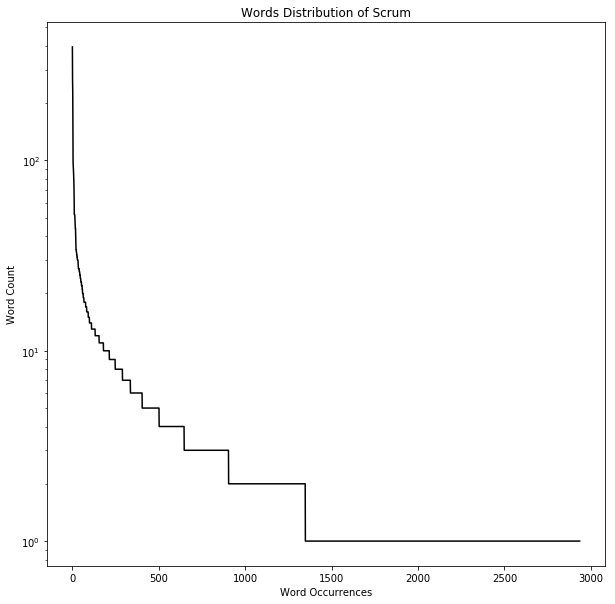

In [56]:
values_scrum = scrum_dict_plot_sort.values()

plt.figure(figsize = (10,10))
plt.semilogy(values_scrum, color = 'black')
plt.title('Words Distribution of Scrum')
plt.xlabel('Word Occurrences')
plt.ylabel('Word Count')

# For Agile

We have done exactly the same steps that we did for **Scrum above**. That's why there is no need to explain the samme thing again, **all steps are the same**.

In [57]:
tokenized_agile_plot = agile_stop_words_removed.flatMap(lambda sentence: sentence.split(" "))\
.filter(lambda terms: terms != '')

In [58]:
word_frequency_agile_plot = tokenized_agile_plot.map(lambda terms: (terms,1))\
.reduceByKey(lambda a,b: a+b)

In [59]:
def agile_plot():
    
    global agile_dict_plot
    agile_dict_plot = {}

    for tuples in word_frequency_agile_plot.collect():
        agile_dict_plot[tuples[0]] = tuples[1]
    
    return agile_dict_plot

In [60]:
agile_plot()

{'helen': 10,
 'tracy': 7,
 'eds': 80,
 'agile': 748,
 'processes': 58,
 'engineering': 154,
 'extreme': 29,
 'programming': 79,
 'xp': 146,
 'may': 103,
 'open': 77,
 'lecture': 2,
 'notes': 23,
 'business': 141,
 'series': 21,
 'technical': 121,
 'university': 109,
 'john': 4,
 'mylopoulos': 1,
 'trento': 7,
 'italy': 16,
 'michael': 6,
 'queensland': 1,
 'technology': 81,
 'brisbane': 1,
 'australia': 7,
 'j': 154,
 'usa': 21,
 'clemens': 1,
 'szyperski': 1,
 'microsoft': 7,
 'research': 317,
 'redmond': 2,
 'httpwwwspringercomseries': 1,
 'department': 40,
 'milton': 1,
 'science': 27,
 'brunei': 6,
 'issn': 3,
 'ebook': 2,
 'library': 2,
 'congress': 1,
 'book': 8,
 'published': 9,
 'creative': 146,
 'commons': 145,
 'attributionnoncommercial': 21,
 'httpcreativecommonsorglicensesbync': 18,
 'noncommercial': 51,
 'use': 269,
 'adaptation': 38,
 'distribution': 46,
 'medium': 39,
 'format': 39,
 'long': 83,
 'give': 53,
 'source': 78,
 'third': 66,
 'material': 116,
 'line': 56,
 '

In [61]:
agile_dict_plot_data = list(agile_dict_plot.items())

agile_dict_plot_data.sort(key = sort_by_second,reverse = True)

In [62]:
def agile_plot_sort():
    
    global agile_dict_plot_sort
    agile_dict_plot_sort = {}

    for tuples in agile_dict_plot_data:
        agile_dict_plot_sort[tuples[0]] = tuples[1] 
    
    return agile_dict_plot_sort

In [63]:
agile_plot_sort()

{'software': 922,
 'agile': 748,
 'development': 737,
 'team': 554,
 'product': 451,
 'work': 384,
 'teams': 363,
 'project': 354,
 'developers': 343,
 'research': 317,
 'data': 311,
 'process': 308,
 'one': 288,
 'also': 281,
 'time': 281,
 'study': 270,
 'use': 269,
 'code': 248,
 'used': 244,
 'startups': 230,
 'customer': 225,
 'experience': 225,
 'scrum': 220,
 'challenges': 219,
 'design': 217,
 'kanban': 217,
 'user': 214,
 'different': 211,
 'case': 197,
 'using': 196,
 'license': 180,
 'company': 180,
 'practices': 178,
 'would': 176,
 'tools': 176,
 'projects': 176,
 'need': 176,
 'new': 174,
 'two': 169,
 'quality': 158,
 'first': 155,
 'engineering': 154,
 'j': 154,
 'role': 153,
 'questions': 151,
 'pp': 151,
 'xp': 146,
 'creative': 146,
 'working': 146,
 'learning': 146,
 'commons': 145,
 'ux': 143,
 'could': 142,
 'business': 141,
 'h': 141,
 'results': 141,
 'support': 139,
 'change': 136,
 'users': 136,
 'however': 135,
 'management': 134,
 'analysis': 134,
 'et': 133

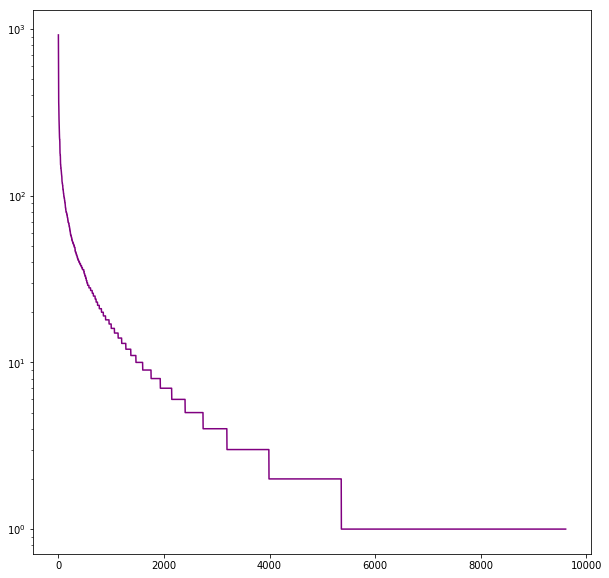

In [64]:
values_agile = agile_dict_plot_sort.values()

plt.figure(figsize = (10,10))
plt.semilogy(values_agile, color = 'purple')

Comparing Scrum vs Agile in a single distribution plot, we can superimpose one over the other and see the trend.

Text(0, 0.5, 'Word Count')

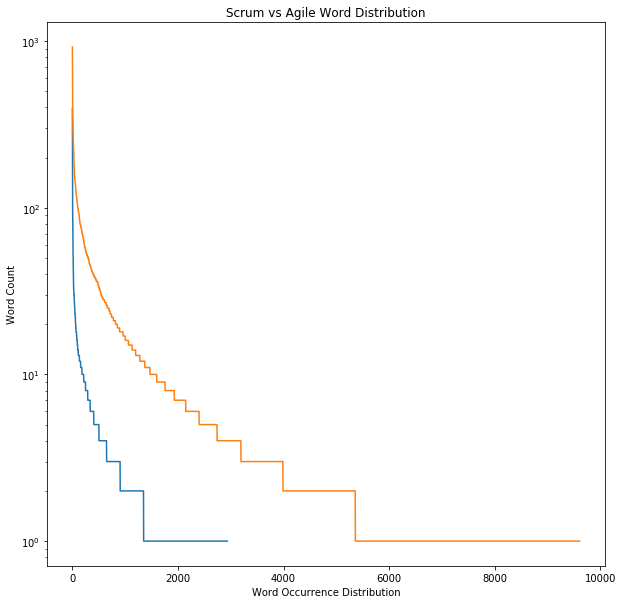

In [65]:
plt.figure(figsize = (10,10))

plt.semilogy(values_scrum)
plt.semilogy(values_agile)
plt.title('Scrum vs Agile Word Distribution')
plt.xlabel('Word Occurrence Distribution')
plt.ylabel('Word Count')

## Top 15 most Common Words Comparison [Scrum vs Agile]

We shall now compare the **15 most common words in both Scrum and Agile**. We will use a **horizontal barplot** to compare the distributions. Converting the `scrum_dict_plot_sort` dictionary into a list and then extracting only the top 15 words from it.

Text(0.5, 1.0, 'Top 15 most common words in Scrum')

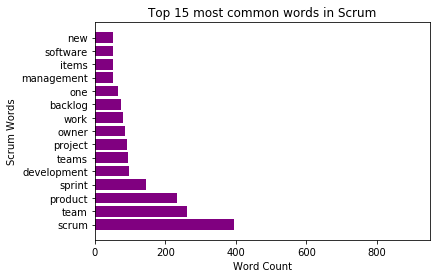

In [66]:
plt.barh(list(scrum_dict_plot_sort.keys())[0:15], list(scrum_dict_plot_sort.values())[0:15], color = 'purple')
plt.xlim(0, 950)
plt.xlabel('Word Count')
plt.ylabel('Scrum Words')
plt.title('Top 15 most common words in Scrum')

Converting the `scrum_dict_plot_sort` dictionary into a list and then extracting only the top 15 words from it.

Text(0.5, 1.0, 'Top 15 most common words in Agile')

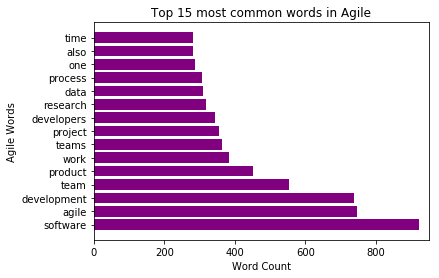

In [67]:
plt.barh(list(agile_dict_plot_sort.keys())[0:15], list(agile_dict_plot_sort.values())[0:15], color = 'purple')
plt.xlim(0, 950)
plt.xlabel('Word Count')
plt.ylabel('Agile Words')
plt.title('Top 15 most common words in Agile')

# References

I have used references from the **Lectures** and **Stackoverflow**. Some of them are listed as below.

1) https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

2) https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black

3) https://stackoverflow.com/questions/53621063/convert-a-list-of-tuples-to-a-dictionary

4) https://stackoverflow.com/questions/22520932/python-remove-all-non-alphabet-chars-from-string